In [1]:
from time import sleep, time
import os
import json
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [2]:
load_dotenv()

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=os.getenv("IBM_TOKEN"),
    set_as_default=True,
    overwrite=True,
)

service = QiskitRuntimeService()

In [3]:
class Colors:
    GREEN = '\033[92m'
    BLUE = '\033[94m'
    ENDC = '\033[0m'

In [4]:
def test(num_qubits:int, local, with_ai, without_ai, results_callback:dict):
    qc = EfficientSU2(num_qubits, entanglement="circular", reps=1).decompose()

    local_result = local.run(qc)
    local_cnots = local_result.num_nonlocal_gates()
    print(f"{Colors.BLUE}Local total CNOTs: {local_cnots}{Colors.ENDC}")

    with_ai_result = with_ai.run(qc)
    with_ai_cnots = with_ai_result.num_nonlocal_gates()
    print(f"{Colors.BLUE}With AI total CNOTs: {with_ai_cnots}{Colors.ENDC}")

    without_ai_result = without_ai.run(qc)
    without_ai_cnots = without_ai_result.num_nonlocal_gates()
    print(f"{Colors.BLUE}Without AI total CNOTs: {without_ai_cnots}{Colors.ENDC}")

    results_callback['cnots_local'].append(local_cnots)
    results_callback['cnots_ai'].append(with_ai_cnots)
    results_callback['cnots_no_ai'].append(without_ai_cnots)

In [5]:
def test_batch(num_qubits:list[int], backend_name:str, local, with_ai, without_ai, results_callback:dict):
    print(f'{Colors.GREEN}Test using: {backend_name} backend{Colors.ENDC}')
    print(f'{Colors.GREEN}qubits: {num_qubits}{Colors.ENDC}')
    
    for nq in num_qubits:
        print(f'{Colors.GREEN}--------------------{Colors.ENDC}')
        print(f'{Colors.GREEN}testing {nq} qubits{Colors.ENDC}')
        test(nq, local, with_ai, without_ai, results_callback)

        print(f'{Colors.GREEN}sleeping for 1s{Colors.ENDC}')
        sleep(1)

In [6]:
def get_transpilers(backend):
    backend_name = backend.name
    
    local = generate_preset_pass_manager(backend=backend, optimization_level=3)
    transpiler_ai = TranspilerService(optimization_level=3, ai="true", backend_name=backend_name)
    transpiler_no_ai = TranspilerService(optimization_level=3, ai="false", backend_name=backend_name)

    return local, transpiler_ai, transpiler_no_ai

In [7]:
def save_results(backend_name, results, num_qubits):
    filename = f"{int(time())} - {backend_name} - {num_qubits[0]}.{num_qubits[-1]}q.json"
    print(f'{Colors.GREEN}saving data at: {filename}{Colors.ENDC}')
    
    results_copy = results.copy()
    results_copy['backend'] = backend_name
    results_copy['num_qubits'] = num_qubits
    
    
    with open(filename, 'w', encoding='utf-8') as file:
        json.dump(results_copy, file, ensure_ascii=False, indent=4)

In [8]:
def plot_results(results, num_qubits, backend_name):
    plt.title(f'{num_qubits[0]} to {num_qubits[-1]} qubits - {backend_name} backend')

    plt.plot(num_qubits, results['cnots_ai'])
    plt.plot(num_qubits, results['cnots_no_ai'])
    plt.plot(num_qubits, results['cnots_local'])
    
    plt.xlabel("Number of qubits")
    plt.ylabel("CNOT count")
    plt.legend(["AI", "without AI", "Local"])
    
    plt.savefig(f'{backend_name}_{num_qubits[0]}_to_{num_qubits[-1]}_qubits_plot.png')
    
    plt.show()

In [ ]:
backend_name = "ibm_sherbrooke"
backend = service.backend(backend_name)
local, transpiler_ai, transpiler_no_ai = get_transpilers(backend)
sherbrooke_results = {
    'cnots_local': [],
    'cnots_ai': [],
    'cnots_no_ai': []
}

In [ ]:
num_qubits = list(range(2, 81))

In [ ]:
test_batch(num_qubits, backend_name, local, transpiler_ai, transpiler_no_ai, sherbrooke_results)

In [ ]:
save_results(backend_name, sherbrooke_results, num_qubits)

In [ ]:
plot_results(sherbrooke_results, num_qubits, backend_name)

In [9]:
backend_name = "ibm_brisbane"
backend = service.backend(backend_name)
local, transpiler_ai, transpiler_no_ai = get_transpilers(backend)
brisbane_results = {
    'cnots_local': [],
    'cnots_ai': [],
    'cnots_no_ai': []
}

In [17]:
num_qubits = list(range(2, 81))

In [15]:
test_batch(num_qubits, backend_name, local, transpiler_ai, transpiler_no_ai, brisbane_results)

Test using: ibm_brisbane backend
qubits: [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
--------------------
testing 44 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 44


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 44


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 44
sleeping for 1s
--------------------
testing 45 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 234


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 48


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 225
sleeping for 1s
--------------------
testing 46 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 229


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 52


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 241
sleeping for 1s
--------------------
testing 47 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 248


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 56


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 260
sleeping for 1s
--------------------
testing 48 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 48


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 48


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 48
sleeping for 1s
--------------------
testing 49 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 277


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 58


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 190
sleeping for 1s
--------------------
testing 50 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 278


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 56


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 263
sleeping for 1s
--------------------
testing 51 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 267


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 54


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 288
sleeping for 1s
--------------------
testing 52 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 52


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 52


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 52
sleeping for 1s
--------------------
testing 53 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 311


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 56


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 284
sleeping for 1s
--------------------
testing 54 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 291


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 60


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 264
sleeping for 1s
--------------------
testing 55 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 307


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 58


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 277
sleeping for 1s
--------------------
testing 56 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 56


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 56


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 56
sleeping for 1s
--------------------
testing 57 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 327


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 60


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 330
sleeping for 1s
--------------------
testing 58 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 328


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 64


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 322
sleeping for 1s
--------------------
testing 59 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 335


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 62


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 335
sleeping for 1s
--------------------
testing 60 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 60


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 60


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 60
sleeping for 1s
--------------------
testing 61 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 274


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 64


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 385
sleeping for 1s
--------------------
testing 62 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 323


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 68


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 371
sleeping for 1s
--------------------
testing 63 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 351


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 66


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 396
sleeping for 1s
--------------------
testing 64 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 64


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 64


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 64
sleeping for 1s
--------------------
testing 65 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 383


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 68


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 368
sleeping for 1s
--------------------
testing 66 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 378


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 72


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 339
sleeping for 1s
--------------------
testing 67 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 352


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 76


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 406
sleeping for 1s
--------------------
testing 68 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 68


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 68


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 68
sleeping for 1s
--------------------
testing 69 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 390


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 78


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 417
sleeping for 1s
--------------------
testing 70 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 388


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 76


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 409
sleeping for 1s
--------------------
testing 71 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 425


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 74


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 410
sleeping for 1s
--------------------
testing 72 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 72


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 72


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 72
sleeping for 1s
--------------------
testing 73 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 412


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 76


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 451
sleeping for 1s
--------------------
testing 74 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 383


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 80


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 437
sleeping for 1s
--------------------
testing 75 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 396


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 78


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 360
sleeping for 1s
--------------------
testing 76 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 76


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 76


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 76
sleeping for 1s
--------------------
testing 77 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 527


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 80


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 488
sleeping for 1s
--------------------
testing 78 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 522


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 84


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 480
sleeping for 1s
--------------------
testing 79 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 451


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 91


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 457
sleeping for 1s
--------------------
testing 80 qubits


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Local total CNOTs: 80


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


With AI total CNOTs: 80


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Without AI total CNOTs: 80
sleeping for 1s


In [18]:
save_results(backend_name, brisbane_results, num_qubits)

saving data at: 1718030622 - ibm_brisbane - 2.80q.json


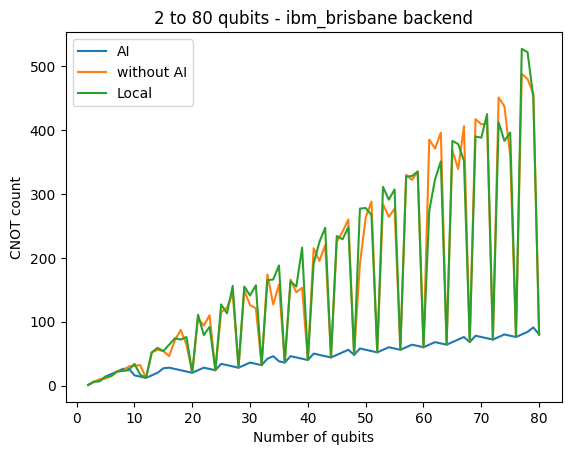

In [19]:
plot_results(brisbane_results, num_qubits, backend_name)

In [ ]:
# plot images side by side
# check same number of cnots (pandas)
# check the backends topology